**Oil and gas Machine Learning Project**

    
**Problem statement** :  
To develop a regression model that takes operational parameters as inputs and provides oil-production rates as outputs.





**1. Import libraries and Dataset**

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/main/Volve%20P-12_DatesCorrected.csv',index_col=0, parse_dates = True)

In [ ]:
df

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-09,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-10,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-11,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


In [ ]:
df.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2007-01-09 to 2016-01-12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onstreaminject_HRS              3291 non-null   float64
 1   BORE_WI_VOL                     3291 non-null   int64  
 2   ON_STREAM_HRS                   3291 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64
 5   AVG_DP_TUBING                   3291 non-null   float64
 6   AVG_ANNULUS_PRESS               3291 non-null   float64
 7   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64
 8   AVG_WHP_P                       3291 non-null   float64
 9   AVG_WHT_P                       3291 non-null   float64
 10  DP_CHOKE_SIZE                   3291 non-null   float64
 11  BORE_OIL_VOL                    3291 non-null   float64
 12  BORE_GAS_VOL    

In [ ]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

**2. Columns - select input and output columns**

Correlation Analysis has been used as a Quick-Hack to the same

Too High or Too Low Correlation magnitudes need to be avoided.

In [ ]:
output_col = 'BORE_OIL_VOL'

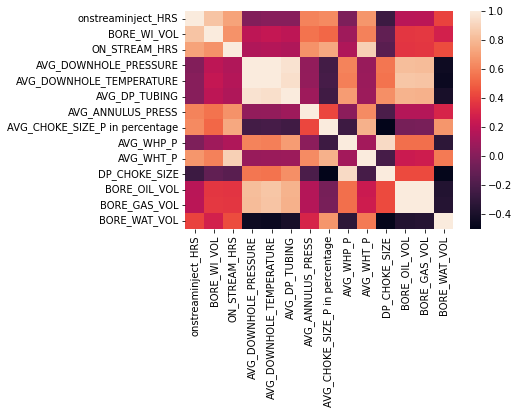

In [ ]:
sns.heatmap(df.corr())

since some features are fairly inter-related , which breaks the assumption of LinRegression and hence we might see troubles in model performances.

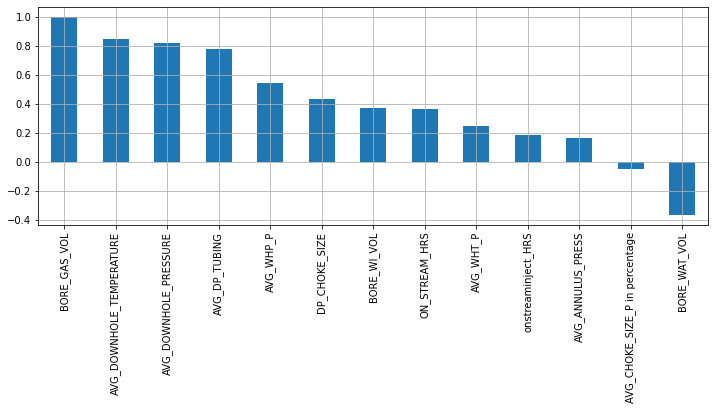

In [ ]:
df.corr()[output_col].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(12,4), grid=True)

In [ ]:
corr_df = pd.DataFrame(df.corr()[output_col].sort_values(ascending=False)[1:])
corr_df.columns=['Corr']    

In [ ]:
corr_df

,Corr
BORE_GAS_VOL,0.998661
AVG_DOWNHOLE_TEMPERATURE,0.850241
AVG_DOWNHOLE_PRESSURE,0.819920
AVG_DP_TUBING,0.778941
AVG_WHP_P,0.544204
DP_CHOKE_SIZE,0.434375
BORE_WI_VOL,0.368739
ON_STREAM_HRS,0.361124
AVG_WHT_P,0.245750
onstreaminject_HRS,0.182405


In [ ]:
input_columns = corr_df[(abs(corr_df['Corr'])>0.2) & (corr_df['Corr']<0.90)].index

**Selecting features with good (but not extreme) correlations with output variables.**

In [ ]:
input_columns

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P', 'BORE_WAT_VOL'],
      dtype='object')

**3. Naming input matrix as X and output matrix as Y**

In [ ]:
X = df[input_columns] ; y = df[output_col]

In [ ]:
X.shape , y.shape

((3291, 9), (3291,))

**4. Train - Test (or Validation) Split.**
   
In Time series Projects, we cannot do a shuffle/permutation based split.
We need to maintain the sequence.

so I am keeping last 291 days as testing or validation set.

In [ ]:
train_length = 3000 #days

X_train , y_train = X.iloc[:train_length,:] , y[:train_length]

X_test , y_test = X.iloc[train_length:, :] , y[train_length:]

In [ ]:
X_train.shape , X_test.shape

((3000, 9), (291, 9))

**5. Feature Scaling. For better training (in select models)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [ ]:
# scaler = MinMaxScaler()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**6. Training A Machine Learning model.**

**6.1 Option 1 : Multiple Linear Regression Model**


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train_scaled , y_train)

LinearRegression()

In [ ]:
yp_train = lm.predict(X_train_scaled)

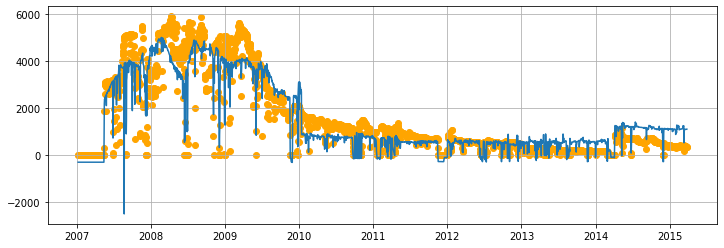

In [ ]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length] , y_train, color='orange')
plt.plot(df.index[:train_length] , yp_train)

plt.grid()

In [ ]:
yp_test = lm.predict(X_test_scaled)

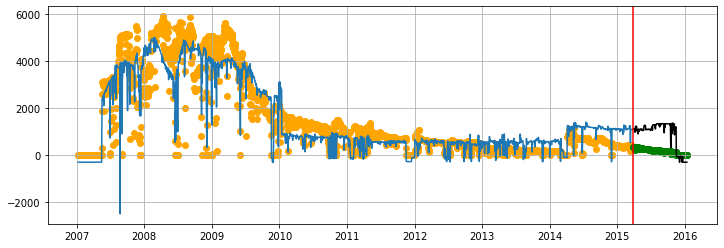

In [ ]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length] , y_train, color='orange')
plt.plot(df.index[:train_length] , yp_train)

plt.scatter(df.index[train_length:] , y_test, color='green')
plt.plot(df.index[train_length:] , yp_test, color='black')


plt.axvline(df.index[train_length], color='red')


plt.grid()


**Option 2: Random Forest Regressor Model**

Ensemble Method | Ensemble of Trees 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train , y_train)

yp_train = rf.predict(X_train)

yp_test = rf.predict(X_test)

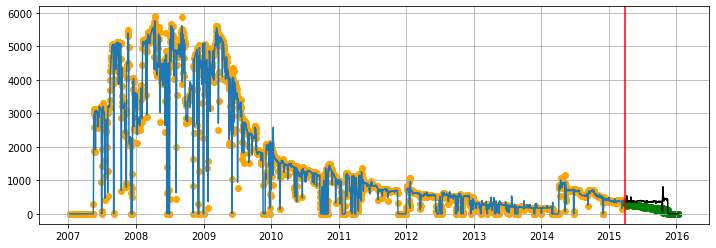

In [ ]:
plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length] , y_train , color = 'orange')
plt.plot(df.index[:train_length] , yp_train)

plt.scatter(df.index[train_length: ] , y_test , color = 'green')
plt.plot(df.index[train_length: ] , yp_test , color ='black')

plt.axvline(df.index[train_length], color ='red')

plt.grid()